## Choose a classification dataset of your choice and perform the following.

## 1. Clean and prepare the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('Mall_Customers.csv')

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
from sklearn.preprocessing import LabelEncoder
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [9]:
# df.
# q1 = df.height.quantile(0.25)
# q3 = df.height.quantile(0.75)
# iqr = q3 - q1
# lowerlimit = q1 - (1.5*iqr)
# upperlimit = q3 + (1.5*iqr)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]

In [12]:
X = scaler.fit_transform(X)

In [13]:
X = pd.DataFrame(X,columns=['Annual_Income','Spending_Score'])

## 2. Build clusters using K-means; choose K=3, metric as Eucledian.

In [14]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(X)

KMeans(n_clusters=3)

In [15]:
km.cluster_centers_

array([[ 0.99158305,  1.23950275],
       [ 1.00919971, -1.22553537],
       [-0.62618966, -0.01439238]])

In [16]:
km.inertia_

157.70400815035939

In [17]:
res = X.copy()
km_pred = km.predict(X)
res['Cluster'] = km_pred

<AxesSubplot:xlabel='Annual_Income', ylabel='Spending_Score'>

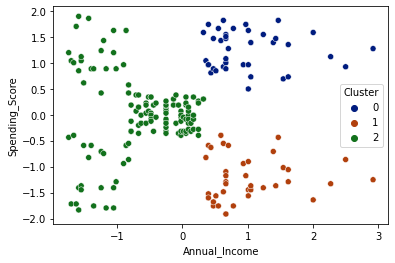

In [18]:
sns.scatterplot(x='Annual_Income',y='Spending_Score',data=res,hue='Cluster',palette='dark')

## 3. Print the optimal k value and within cluster SSE for that k value

In [19]:
k = []
i = []

In [20]:
for a in range(1,16,1):
    km = KMeans(n_clusters=a)
    km.fit(X)
    k.append(a)
    i.append(km.inertia_)

[Text(0.5, 0, 'no. of cluster'), Text(0, 0.5, 'WCSS')]

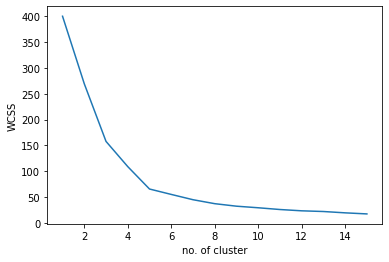

In [21]:
sns.lineplot(x=k,y=i,).set(xlabel="no. of cluster",ylabel="WCSS")

In [22]:
# from the graph the optimal k value is 5
km_op = KMeans(n_clusters=5)
km_op.fit(X)
km_op.inertia_

65.56840815571681

In [23]:
res_op = X.copy()
km_op_pred = km_op.predict(X)
res_op['Cluster'] = km_op_pred

<AxesSubplot:xlabel='Annual_Income', ylabel='Spending_Score'>

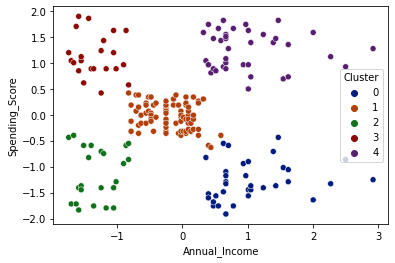

In [24]:
sns.scatterplot(x='Annual_Income',y='Spending_Score',data=res_op,hue='Cluster',palette='dark')

## 4. Build clusters using agglomerative clustering for the random 10 datapoints of that dataset and display dendrogram tree

In [25]:
df1 = df.sample(n=10)
X1 = df1[['Annual Income (k$)','Spending Score (1-100)']]

In [26]:
from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler()
X_scaler1 = scaler.fit_transform(X1)

X_normalize = normalize(X_scaler1)
print(type(X_normalize))

<class 'numpy.ndarray'>


In [27]:
X_normalize = pd.DataFrame(X_normalize,columns=['Annual_Income','Spending_Score'])

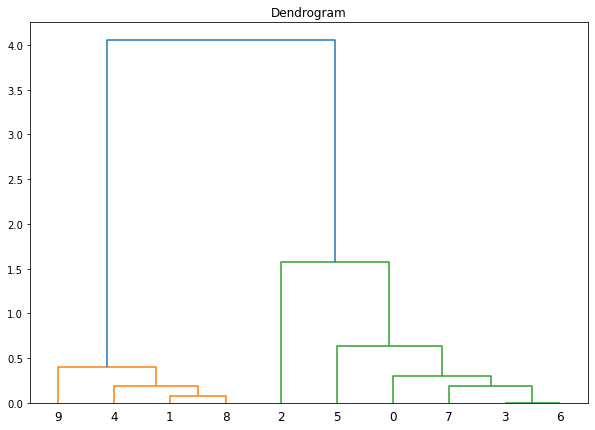

In [28]:
import scipy.cluster.hierarchy as shc
link = shc.linkage(X_normalize,method='ward')
plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend = shc.dendrogram(link)

In [29]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
y = cluster.fit_predict(X_normalize)

In [30]:
cluster.labels_

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

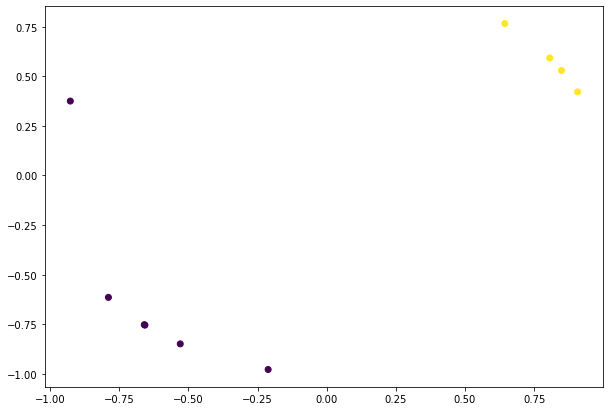

In [31]:
plt.figure(figsize=(10,7))
plt.scatter(X_normalize['Annual_Income'],X_normalize['Spending_Score'],c=cluster.labels_)
sns.scatterplot(x=)